<a href="https://colab.research.google.com/github/annlj/MLBootcamp21_Assignment/blob/main/MLBootcamp21_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML Bootcamp 2021 - Week 3: Assignment

- In this week you will learn more about the Pandas and specifically use it to create features
- Finally these features will be used to train a Logistic Regression model and you will submit your solution to the Kaggle ****Titanic Machine Learning from Disaster**** competition
- The comments will have most of the instructions
- Attempt the questions using only python/pandas as much as possible as it is a very in-demand skill right now and learning it will be beneficial

## USE TRAIN DATASET FROM THE TITANIC DATASET PROVIDED ONLY UNLESS SPECIFIED

In [ ]:
# Import the necessary Libraries here

import pandas as pd
import numpy as np
import math
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
!pip install category_encoders
import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.utils import resample
import matplotlib.pyplot as plt
import re
import seaborn as sb

## Q1. What is the average ticket price per ticket class(Pclass) for each individual port of embarkation? In other words, what is the price of each ticket class for each category of "Embarked" column?

## Your answer should be in the following format as a Python Dictionary

{<br>
  (Pclass,Embarked Category) : Avg Fare<br>
}

Eg:

{<br>
 (1, 'C'): Avg Fare,<br>
 (1, 'Q'): Avg Fare,<br>
 (1, 'S'): Avg Fare,<br>
 .<br>
 .<br>
 .<br>
 so on..<br>
}


## You can verify your answer as follows: 
 - For the "Embarked" category 'Q' and 'Pclass' of 1 the average ticket price is \$ 90
 - For the "Embarked" category 'S' and 'Pclass' of 3 the average ticket price is \$ 14.64

## Q2. Create the "Title" feature in your dataset as an additional column and call it "Title". This "Title" will be extracted from the name and will be the Title given to each name which can be "Mr.", "Mrs.", "Dr." and many more. Refer to the last question of Week 1 Assignment for reference

- Only create the extra column called "Title" in your existing dataframe, no need to report any answer as you will be using all these features in the next few questions

In [ ]:
# Try to use regular expressions and use the pandas .apply() lambda function to solve 
# this as these are very powerful functions that will benefit you if learned now
df_train['Title'] = df_train['Name'].apply(lambda x: re.findall(' ([A-Z][a-z]+)\.',x)[0])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


## Q3. Use the dataframe from above, which should include the "Title" column now, if you have successfully completed Q2. Encode this "Title" column using any encoding technique of your choice. Explore the various encoding techniques by reading this article:

https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html


- As a start you can use any of the following techniques but there are many more
  - pandas get_dummies()
  - One hot encoding
  - Label encoding
- Explore each of the above techniques as you will learn a lot just by reading them


In [ ]:
# pandas get_dummies()
df_encode = pd.get_dummies(df_train['Title'])
#pd.concat([df_train,df_encode],axis=1)
# One hot encoding
ce.OneHotEncoder(cols=['Title']).fit_transform(df_train)


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Title_7,Title_8,Title_9,Title_10,Title_11,Title_12,Title_13,Title_14,Title_15,Title_16,Title_17
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Q4. This is an open ended Optional question. Explore the data as we have done for Week 3 class and create a new feature of your own. Add it as a new column to the dataframe. 

- This feature might help you get a good score for your Kaggle submission

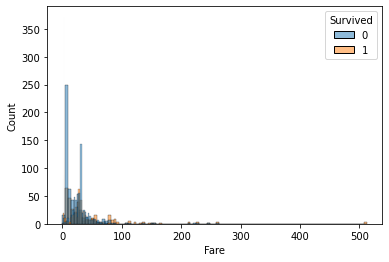

In [ ]:
# Follow the same process as the previous class notebooks on creating new columns. 
# This feature can be as simple as combining two columns by multiplying/dividing them with each other
# Feel free to have a discussion in the group as this is a tricky Feature Engineering problem and might not be straightforward, hence optional.
df_train['Title']
pd.concat([df_train,df_train['Title']],axis=1)

df_train[["C", "Q", "S"]] = pd.get_dummies(df_train["Embarked"])
df_train[["male", "female"]] = pd.get_dummies(df_train["Sex"])
df_train

missing_ages = df_train['Age'].isnull()
mean_ages = df_train.groupby('Sex')['Age'].mean()

def remove_na_ages(row):
   
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex']]
    else:
        return row['Age']

df_train['Age'] = df_train.apply(remove_na_ages, axis=1)

df_train["Age_Normalized"] = df_train['Age'].apply(lambda x: (x-df_train['Age'].mean())/df_train['Age'].std())

df_train["Fare_Normalized"] = df_train['Fare'].apply(lambda y: (y-df_train['Fare'].mean())/df_train['Fare'].std())

df_train
#df_train_expand = df_train.join(df_encode[["Mr.", "Mrs.", "Miss."]])
sb.histplot(x = "Fare", data = df_train, hue = "Survived")
sb.histplot(x = "Pclass", data = df_train, hue = "Survived")
sb.histplot(x = "Age", data = df_train, hue = "Survived")

## Q5. Create a LogisticRegression model as done in class. Use the dataset you have developed after answering all the previous questions(make sure all the data is only numerical). Train your model on the "train.csv" file, and then make predictions on your "test.csv" file. Format your output EXACTLY as shown in class at the very end and EXACTLY like the "gender_submission.csv" file provided as part of the challenge

- Once you have created your own submission file, submit it on Kaggle for evaluation
- Report the score as obtained from the kaggle website here and store it in a variable called ```result```

In [ ]:

df_train
#df_train.drop(['PassengerId','Name','Embarked','Sex','Ticket','Cabin','Embarked','Title'],inplace=True,axis=1)
#df_train.drop(['C','Q','S'],inplace=True,axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:,'Pclass':], df_train.Survived, test_size=0.20, random_state=1)
model = LogisticRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       106
           1       0.76      0.74      0.75        73

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

